In [1]:
import torch
import matplotlib.pyplot as plt
import config

import sys
sys.path.append(config.root_path)

from SemanticPequeNet import SemanticTrainer
from util import *
from unets_classic import *
from MobileNetV2 import *
from LaRS_dataset import *


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
in_channels            = 3
num_classes            = 3
info_dataset_resolution=256
info_dataset_image_size=256
info_dataset_batch_size=8
train_loader, test_loader, val_loader = get_LaRS_datasets(dataset_dir=config.dataset_path, 
                                                resolution=info_dataset_resolution, 
                                                batch_size=info_dataset_batch_size, 
                                                augmented=True)

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

torch.Size([8, 3, 256, 256]) torch.Size([8, 1, 256, 256])


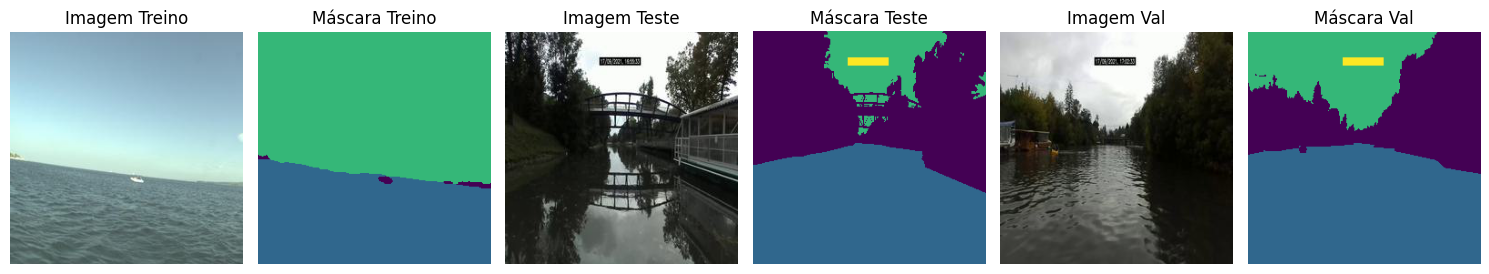

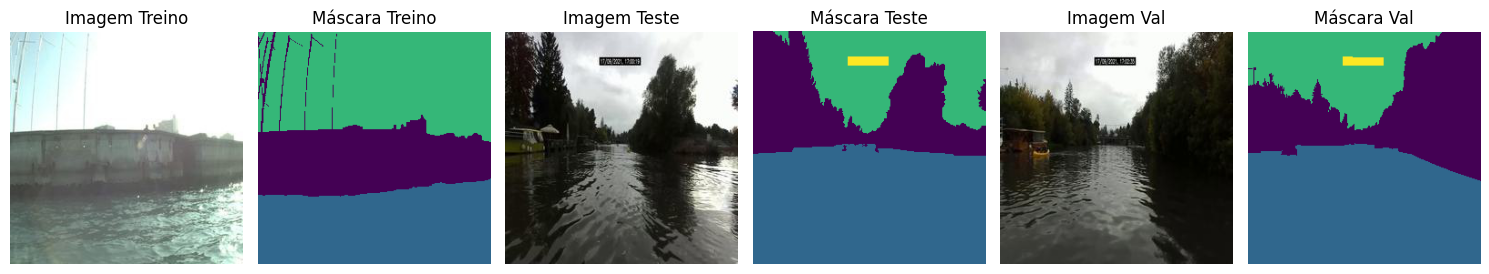

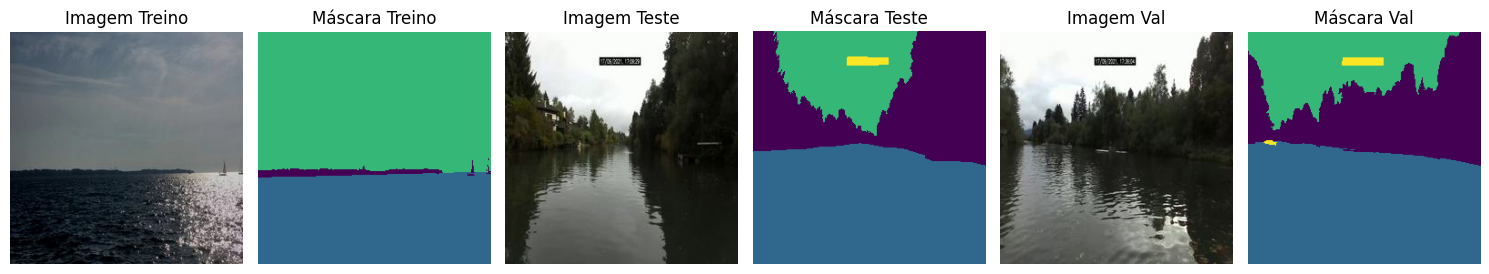

In [ ]:
show_dataset_prev(train_loader, test_loader, val_loader, num_images=3, num_classes=num_classes)

In [7]:
epochs       = 300
model_name   = 'u-net-classic-aug'
path         = 'u-net-CIARP'

In [8]:
unet_size = 'P'
model = getUnetClassic(unet_size, in_channels=in_channels, out_channels=num_classes)
model_filename = f'{model_name}-{unet_size}-epochs{epochs}.pth'
trainer = SemanticTrainer(num_classes=num_classes,
                          model_filename=model_filename,                          
                          model_dir=path, 
                          info={'u-net_size':unet_size},
                          save_xlsx=True)

model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


trainable_parameters: 1941139


Parando na época 78 por early stopping. 0.2457 Dice: 0.9470 mIoU: 0.9042 IoU: 0.8778 Precision: 0.9381 Recall: 0.9590 Q: 0.8582 Tempo total: 00:48:32 LR:0.000250

Melhor modelo:
 Epoch [58/300] - Loss: 0.0248 Val Loss: 0.2104 Dice: 0.9476 mIoU: 0.9054 IoU: 0.8804 Precision: 0.9399 Recall: 0.9586 Q: 0.8600 Tempo total: 00:36:20 LR:0.000500
Ultimo modelo:
 Epoch [78/300] - Loss: 0.0154 Val Loss: 0.2457 Dice: 0.9470 mIoU: 0.9042 IoU: 0.8778 Precision: 0.9381 Recall: 0.9590 Q: 0.8582 Tempo total: 00:48:32 LR:0.000250 FPS: 631.21
Saved as u-net-CIARP/u-net-classic-aug-P-epochs300.pth
u-net-CIARP/outputs/sample0-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample1-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample2-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample3-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample4-u-net-classic-aug-P-epochs300.png saved.


In [ ]:

model = getDeepLabV3_MobileNetV2(num_classes, in_channels=in_channels)

model_name     = 'MobileNetV2'
path           = model_name
model_filename = f'{model_name}-epochs{epochs}.pth'
trainer = MobileNetV2SemanticTrainer(num_classes=num_classes,
                                    model_filename=model_filename,
                                    model_dir=path, 
                                    info={'weights':'DEFAULT'},
                                    save_xlsx=True)
model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


trainable_parameters: 12648451
Parando na época 57 por early stopping. 0.0984 Dice: 0.9485 mIoU: 0.9060 IoU: 0.8576 Precision: 0.9412 Recall: 0.9589 Q: 0.8603 Tempo total: 00:33:18 LR:0.000500

Melhor modelo:
 Epoch [37/300] - Loss: 0.0487 Val Loss: 0.0832 Dice: 0.9496 mIoU: 0.9080 IoU: 0.8558 Precision: 0.9431 Recall: 0.9595 Q: 0.8634 Tempo total: 00:21:40 LR:0.001000
Ultimo modelo:
 Epoch [57/300] - Loss: 0.0426 Val Loss: 0.0984 Dice: 0.9485 mIoU: 0.9060 IoU: 0.8576 Precision: 0.9412 Recall: 0.9589 Q: 0.8603 Tempo total: 00:33:18 LR:0.000500 FPS: 1016.68
Saved as MobileNetV2/MobileNetV2-Medetec-epochs300.pth
MobileNetV2/outputs/sample0-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample1-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample2-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample3-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample4-MobileNetV2-Medetec-epochs300.png saved.
